<figure>
  <IMG SRC="input/FAU.png" WIDTH=250 ALIGN="right">
</figure>

# GSEApy: Gene Set Enrichment Analysis in Python
    
*David B. Blumenthal*, *Suryadipto Sarkar*


---
## GSEApy is a python implementation for GSEA and wrapper for Enrichr.


It’s used for convenient GO enrichments and produce publication-quality figures from python.

GSEAPY could be used for RNA-seq, ChIP-seq, Microarry data.

Gene Set Enrichment Analysis (GSEA) is a computational method that determines whether an a priori defined set of genes shows statistically significant, concordant differences between two biological states (e.g. phenotypes).

The full GSEA is far too extensive to describe here; see GSEA documentation for more information.


### GSEApy has six sub-commands available: `gsea`, `prerank`, `ssgsea`, `replot` `enrichr`, `biomart`.

* The `gsea` module produces GSEA results. The input requries a txt file(FPKM, Expected Counts, TPM, et.al), a cls file, and gene_sets file in gmt format.

* The `prerank` module produces **Prerank tool**  results. The input expects a pre-ranked gene list dataset with correlation values, provided in .rnk format, and gene_sets file in gmt format. `prerank` module is an API to GSEA pre-rank tools.

* The `ssgsea` module performs **single sample GSEA(ssGSEA)** analysis. The input expects a pd.Series (indexed by gene name), or a pd.DataFrame (include `GCT` file) with expression values and a `GMT` file. For multiple sample input, ssGSEA reconigzes gct format, too. ssGSEA enrichment score for the gene set is described by [D. Barbie et al 2009](http://www.nature.com/nature/journal/v462/n7269/abs/nature08460.html).

* The `replot` module reproduce GSEA desktop version results. The only input for GSEApy is the location to `GSEA` Desktop output results.

* The `enrichr` module enable you perform gene set enrichment analysis using `Enrichr` API. Enrichr is open source and freely available online at: http://amp.pharm.mssm.edu/Enrichr . It runs very fast.

* The `biomart` module helps you convert gene ids using BioMart API.

In [1]:
import gseapy as gp
import pandas as pd
gp.__version__


'0.10.8'

## 1. Enrichr

### Enrichr is a web-based tool for gene over-representation analysis using functional annotations. Enrichr has more than 30 geneset libraries.  

![Benjamin Bannekat](https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2F1471-2105-14-128/MediaObjects/12859_2013_Article_5841_Fig1_HTML.jpg?as=webp)

Enrichr is open source and freely available online at: http://amp.pharm.mssm.edu/Enrichr 
---


### Data format

The only thing you need to prepare is a gene list file.

Note: Enrichr uses a list of Entrez gene symbols as input.

For enrichr, you can either use a list of genes or directly pass a .txt file to `gene_list`.
### Read an example `gene_list.txt` file

In [2]:
gene_list = pd.read_csv("input/gene_list.txt",header=None, sep="\t")
gene_list.head()

,0
0,IGKV4-1
1,CD55
2,IGKC
3,PPFIBP1
4,ABHD4


Make a list out of it:

In [3]:
glist = gene_list.squeeze().str.strip().tolist()
print(glist[:10])

['IGKV4-1', 'CD55', 'IGKC', 'PPFIBP1', 'ABHD4', 'PCSK6', 'PGD', 'ARHGDIB', 'ITGB2', 'CARD6']




### Various libraries support:


In [4]:
names = gp.get_library_name() # default: Human
names[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

### Various organisms support
Select database from { ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ }

In [10]:
yeast = gp.get_library_name(organism='Yeast')
yeast[:10]

['Cellular_Component_AutoRIF',
 'Cellular_Component_AutoRIF_Predicted_zscore',
 'GO_Biological_Process_2018',
 'GO_Biological_Process_AutoRIF',
 'GO_Biological_Process_AutoRIF_Predicted_zscore',
 'GO_Cellular_Component_2018',
 'GO_Cellular_Component_AutoRIF',
 'GO_Cellular_Component_AutoRIF_Predicted_zscore',
 'GO_Molecular_Function_2018',
 'GO_Molecular_Function_AutoRIF']


### Running Enrichr

#### Differenr input options 
Multi-libraries names supported, separate each name by comma or input a list.

For example:

In [6]:
# gene_list
gene_list="input/gene_list.txt",
gene_list=glist
# gene_sets
gene_sets='KEGG_2016'
gene_sets='KEGG_2016,KEGG_2013'
gene_sets=['KEGG_2016','KEGG_2013']

In [7]:
enr = gp.enrichr(gene_list="input/gene_list.txt",
                 gene_sets=['KEGG_2016','KEGG_2013'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir='output/enrichr_kegg',
                 # no_plot=True,
                 cutoff=0.05
                )

/Users/dbblumenthal/opt/anaconda3/envs/python-intro/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/dbblumenthal/opt/anaconda3/envs/python-intro/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


### Enrichr results available as a Pandas DataFrame:

In [8]:
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2016,Osteoclast differentiation Homo sapiens hsa04380,28/132,3.104504e-13,7.885440e-11,0,0,6.659625,191.802220,LILRA6;ITGB3;LILRA2;LILRA5;PPP3R1;FCGR3B;SIRPA...
1,KEGG_2016,Tuberculosis Homo sapiens hsa05152,31/178,4.288559e-12,5.446470e-10,0,0,5.224941,136.763196,RAB5B;ITGB2;PPP3R1;HLA-DMA;FCGR3B;HLA-DMB;CASP...
2,KEGG_2016,Phagosome Homo sapiens hsa04145,28/154,1.614009e-11,1.366528e-09,0,0,5.490501,136.437381,ATP6V1A;RAB5B;ITGB5;ITGB3;ITGB2;HLA-DMA;FCGR3B...
3,KEGG_2016,Rheumatoid arthritis Homo sapiens hsa05323,19/90,2.197884e-09,1.395656e-07,0,0,6.554453,130.668081,ATP6V1A;ATP6V1G1;ATP6V0B;TGFB1;ITGB2;FOS;ITGAL...
4,KEGG_2016,Leishmaniasis Homo sapiens hsa05140,17/73,3.132614e-09,1.591368e-07,0,0,7.422186,145.336773,TGFB1;IFNGR1;PRKCB;IFNGR2;ITGB2;FOS;MAPK14;HLA...


### Plotting
#### Barplot:


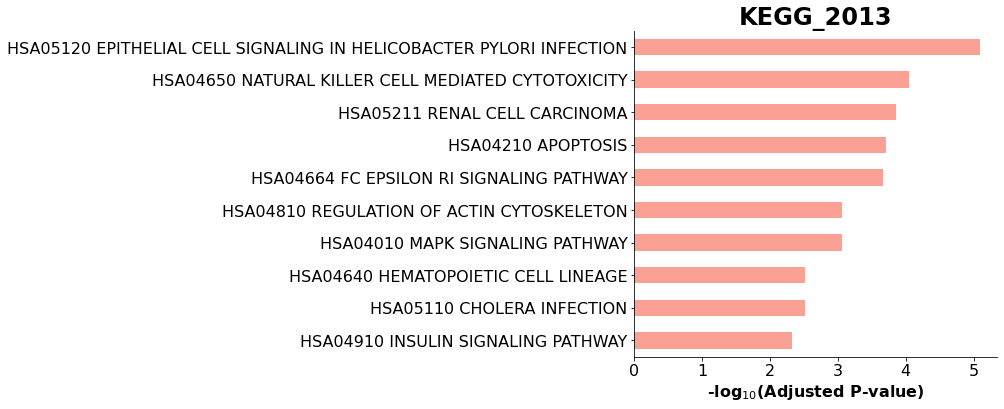

In [11]:
from gseapy.plot import barplot, dotplot
# to save your figure, make sure that ``ofname`` is not None
barplot(enr.res2d,title='KEGG_2013',)

#### Dotplot:

<AxesSubplot:title={'center':'KEGG_2013'}, xlabel='-log$_{10}$(Adjusted P-value)'>

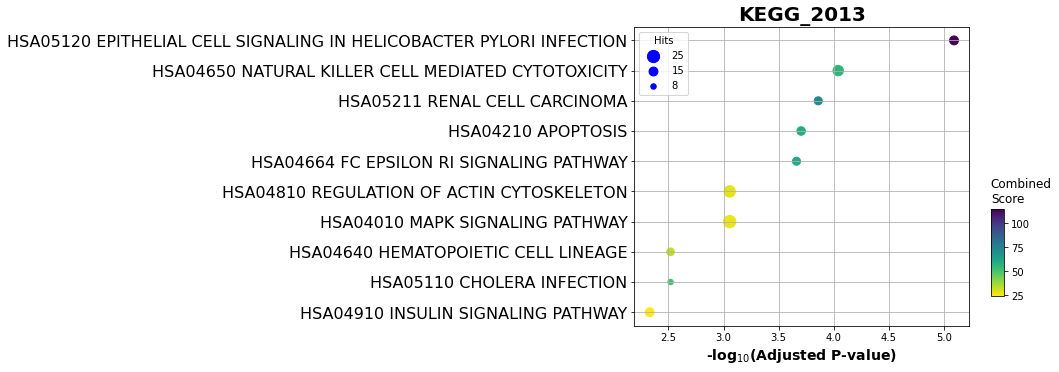

In [12]:
# to save your figure, make sure that ``ofname`` is not None
dotplot(enr.res2d, title='KEGG_2013',cmap='viridis_r')

---
## <a name="ex1"></a>Exercise 1

Redo the analysis using only `Disease_Signatures_from_GEO_up_2014` library. Make a dotplot and save it as disease_sig.png in the output directory

<a href="#ex1sol">Solution for Exercise 1</a>

## 2. Prerank 

### Runs the gene set enrichment analysis against a user-supplied ranked list of genes.

Gene Set Enrichment Analysis (GSEA) is a powerful analytical method for interpreting gene expression data.  It evaluates cumulative changes in the expression of groups of multiple genes defined based on prior biological knowledge. 



The GSEAPreranked module can be used to conduct gene set enrichment analysis on data that do not conform to the typical GSEA scenario. For example, it can be used when the ranking metric choices provided by the GSEA module are not appropriate for the data, or when a ranked list of genomic features deviates from traditional microarray expression data (e.g., GWAS results, ChIP-Seq, RNA-Seq, etc.).

The user provides GSEAPreranked with a pre-ranked gene list.  Paired with each gene in the list is the numeric ranking statistic, which GSEAPreranked uses to rank order genes in descending order. GSEAPreranked calculates an enrichment score for each gene set.  A gene set’s enrichment score reflects how often members of that gene set occur at the top or bottom of the ranked data set (for example, in expression data, in either the most highly expressed genes or the most underexpressed genes).

### Interpreting results

![img](http://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideTEXT.fld/image009.jpg)






* The top portion of the plot shows the running ES for the gene set as the analysis walks down the ranked list. The score at the peak of the plot (the score furthest from 0.0) is the ES for the gene set. Gene sets with a distinct peak at the beginning (such as the one shown here) or end of the ranked list are generally the most interesting.



* The middle portion of the plot shows where the members of the gene set appear in the ranked list of genes.

    The **leading edge subset** of a gene set is the subset of members that contribute most to the ES. For a positive ES (such as the one shown here), the leading edge subset is the set of members that appear in the ranked list prior to the peak score. For a negative ES, it is the set of members that appear subsequent to the peak score.
    


* The bottom portion of the plot shows the value of the ranking metric as you move down the list of ranked genes. The ranking metric measures a gene’s correlation with a phenotype. The value of the ranking metric goes from positive to negative as you move down the ranked list. A positive value indicates correlation with the first phenotype and a negative value indicates correlation with the second phenotype. For continuous phenotypes (time series or gene of interest), a positive value indicates correlation with the phenotype profile and a negative value indicates no correlation or inverse correlation with the profile.

### Assign prerank() with a pd.DataFrame, pd.Series , or a txt file
Do not include header in your gene list.
GSEApy will skip any data after “#”.
Only contains two columns, or one cloumn with gene_name indexed when assign a DataFrame to prerank

In [15]:
rnk = pd.read_csv("input/edb/gsea_data.gsea_data.rnk", header=None, sep="\t")
rnk.head()

,0,1
0,CTLA2B,2.502482
1,SCARA3,2.095578
2,LOC100044683,1.116398
3,CMBL,0.877640
4,CLIC6,0.822181


### Run prerank
enrichr libraries are supported by prerank module. Just provide the name

In [16]:

# use 4 process to acceralate the permutation speed

# note: multiprocessing may not work on windows
pre_res = gp.prerank(rnk=rnk, gene_sets='KEGG_2016',
                     processes=4,
                     permutation_num=100, # reduce number to speed up testing
                     outdir='output/prerank_report_kegg', format='png', seed=6)

### Access results through obj.res2d attribute or obj.results

In [17]:

pre_res.res2d.sort_index().head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Cytokine-cytokine receptor interaction Homo sapiens hsa04060,0.418234,1.526671,0.064935,0.591133,265,18,IL13RA1;CSF1;CCL2;TGFBR2;CD40;IL10RB;CXCL10;CX...,IL13RA1;CSF1;CCL2;TGFBR2;CD40;IL10RB;CXCL10
Focal adhesion Homo sapiens hsa04510,0.259225,0.859895,0.629032,0.993103,202,15,COL6A1;PARVA;FLNC;THBS4;LAMB3;PDGFRB;FLT4;ILK;...,COL6A1;PARVA;FLNC;THBS4;LAMB3;PDGFRB
HTLV-I infection Homo sapiens hsa05166,0.338286,1.344137,0.137931,0.643678,258,19,CRTC3;TGFBR2;CD40;PDGFRB;ADCY6;PPP3CC;ETS1;WNT...,CRTC3;TGFBR2;CD40;PDGFRB;ADCY6;PPP3CC;ETS1;WNT...
MAPK signaling pathway Homo sapiens hsa04010,0.179667,0.686976,0.847222,0.811166,255,18,CACNA1H;TGFBR2;FLNC;MAP3K5;PDGFRB;PPP3CC;NFATC...,CACNA1H;TGFBR2;FLNC;MAP3K5;PDGFRB;PPP3CC
Metabolic pathways Homo sapiens hsa01100,0.194868,0.902211,0.617647,1.000000,1239,36,CMBL;CDA;ST3GAL1;PLD2;CYP26A1;ENO2;GALNT4;PYGL...,CMBL;CDA;ST3GAL1;PLD2;CYP26A1;ENO2;GALNT4;PYGL


### Generate your GSEA plot inside python console


In [18]:
# extract geneset terms in res2d
terms = pre_res.res2d.index
terms[:3]

Index(['Pathways in cancer Homo sapiens hsa05200',
       'Cytokine-cytokine receptor interaction Homo sapiens hsa04060',
       'HTLV-I infection Homo sapiens hsa05166'],
      dtype='object', name='Term')

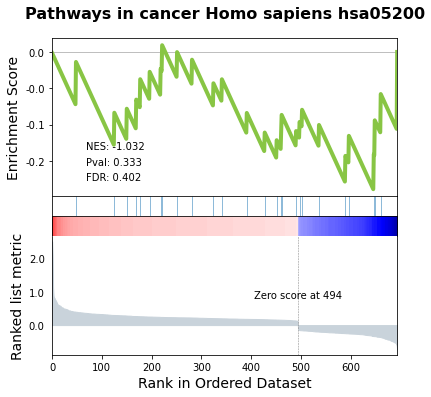

In [90]:
from gseapy.plot import gseaplot

# to save your figure, make sure that ofname is not None
gseaplot(rank_metric=pre_res.ranking, term=terms[0], **pre_res.results[terms[0]])

# save figure
gseaplot(rank_metric=pre_res.ranking, term=terms[0], ofname='output/your.plot.pdf', **pre_res.results[terms[0]])

---
## <a name="ex2"></a>Exercise 2

Find out which pathway has the lowest p-value (not manually, use dataframe sorting) and plot the enrichment score for it

<a href="#ex2sol">Solution for Exercise 2</a>

## 3. GSEA
Gene Set Enrichment Analysis (GSEA) is a computational method that determines whether an a priori defined set of genes shows statistically
significant, concordant differences between two biological states
(e.g. phenotypes).

NOTE: GSEA uses lots of confusing data formats. If you feel lost, check out the description here: https://software.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats


### First we load phenotype data as .cls file:

In [19]:
phenoA, phenoB, class_vector =  gp.parser.gsea_cls_parser("input/P53.cls")


Class_vector is used to indicate group attributes for each sample:

In [20]:
print(class_vector)

['MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'MUT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT']


### Next step is gene expression matrix:

In [21]:
gene_exp = pd.read_csv("input/P53.txt", sep="\t")
gene_exp.head()

,NAME,DESCRIPTION,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
0,TACC2,na,46.05,82.17,16.87,98.60,141.02,114.32,134.34,44.95,...,68.14,32.21,105.89,64.99,53.52,85.47,18.69,32.16,45.70,48.13
1,C14orf132,na,108.34,59.04,25.61,33.11,42.53,9.12,9.36,310.96,...,159.32,10.71,13.59,53.78,57.57,86.80,17.30,102.66,62.16,73.44
2,AGER,na,42.20,25.75,76.01,40.41,32.17,48.28,58.27,42.40,...,51.50,61.48,44.44,45.68,54.17,62.53,83.18,56.57,50.40,36.75
3,32385_at,na,7.43,13.94,8.55,21.13,15.09,19.05,16.47,7.60,...,30.77,21.27,13.36,16.19,12.07,17.62,22.60,4.50,14.59,11.33
4,RBM17,na,11.40,3.00,3.16,2.34,4.43,1.56,6.04,6.16,...,1.62,2.77,4.42,8.91,12.28,3.04,10.13,8.32,8.23,3.91


### Now we are ready to run GSEA. As always we can provide the API with already loaded data or just with paths:

In [22]:
gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='KEGG_2016', # enrichr library names
                 cls= 'input/P53.cls', # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=4, seed= 7,
                 format='png')

/Users/dbblumenthal/opt/anaconda3/envs/python-intro/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


### Access the dataframe results throught res2d attribute:

In [23]:
gs_res.res2d.sort_index().head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
ABC transporters Homo sapiens hsa02010,-0.328540,-1.234130,0.209302,0.535738,44,33,ABCD3;ABCD4;ABCA2;ABCB7;ABCD1;ABCA3;ABCC9;ABCB...,ABCG1;ABCC5;ABCB4;TAP2;CFTR;ABCC10;ABCB11;ABCC...
AGE-RAGE signaling pathway in diabetic complications Homo sapiens hsa04933,-0.261859,-1.077825,0.375000,0.667573,101,90,F3;PIK3CA;PLCE1;NRAS;RELA;RAC1;PLCB3;MAPK13;MA...,COL4A1;AKT3;VCAM1;PIK3R3;SMAD3;STAT1;THBD;SELE...
AMPK signaling pathway Homo sapiens hsa04152,0.198892,0.893478,0.725806,1.000000,124,89,PPP2R5B;PIK3CA;PPP2R5C;CREB3L1;PRKAA1;CREB3;PP...,PPP2R5B;PIK3CA;PPP2R5C;CREB3L1;PRKAA1;CREB3;PP...
Acute myeloid leukemia Homo sapiens hsa05221,0.196716,0.719384,0.872727,1.000000,57,50,MAP2K1;PIK3CA;NRAS;RELA;RPS6KB2;TCF7L2;JUP;RAF...,MAP2K1;PIK3CA;NRAS;RELA;RPS6KB2;TCF7L2;JUP;RAF...
Adherens junction Homo sapiens hsa04520,0.246805,0.975288,0.468750,1.000000,74,66,EP300;YES1;CTNND1;RAC1;WASF1;ERBB2;ACTN1;PTPRF...,EP300;YES1;CTNND1;RAC1;WASF1;ERBB2;ACTN1;PTPRF...


### Make gsea plots:

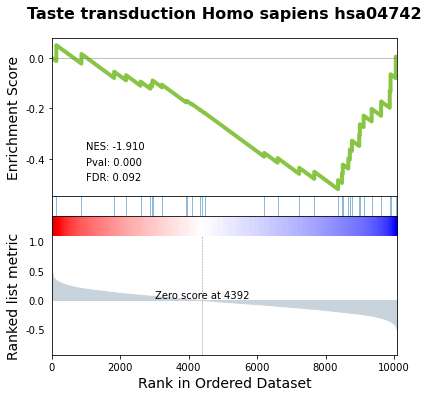

In [24]:
from gseapy.plot import gseaplot, heatmap
terms = gs_res.res2d.index
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gseaplot(gs_res.ranking, term=terms[0], **gs_res.results[terms[0]])

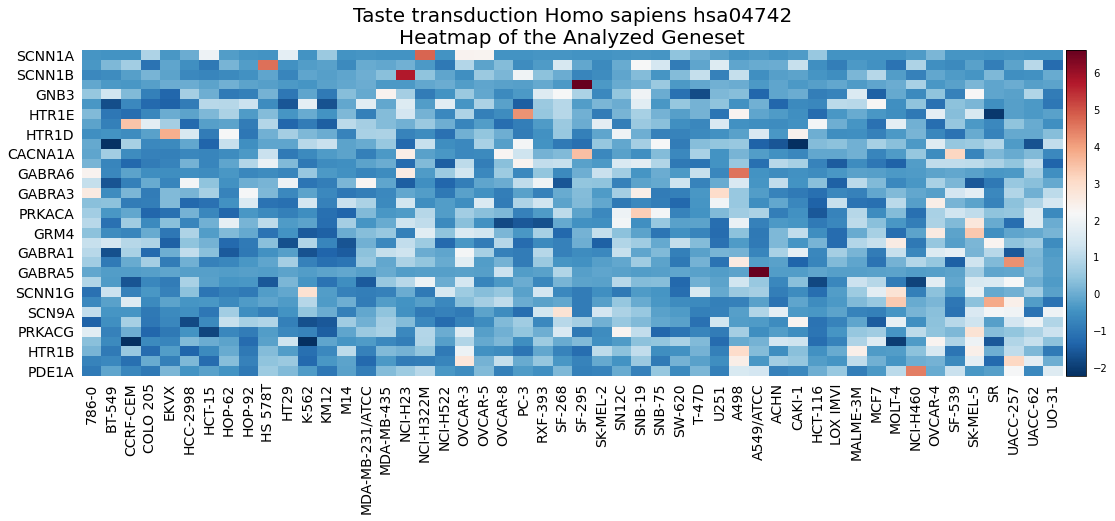

In [31]:
# plotting heatmap
genes = gs_res.res2d.genes[0].split(";")
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
heatmap(df = gs_res.heatmat.loc[genes], z_score=0, title=terms[0], figsize=(18,6))

##  Single Sample GSEA

Single-sample GSEA (ssGSEA), an extension of Gene Set Enrichment Analysis (GSEA), calculates separate enrichment scores for each pairing of a sample and gene set.  Each ssGSEA enrichment score represents the degree to which the genes in a particular gene set are coordinately up- or down-regulated within a sample.

Note: When you run ssGSEA, all genes names in your gene_sets file should be found in your expression table. Example:


#### Expression matrix:

In [25]:
df = pd.read_csv("input/P53_resampling_data.txt", sep="\t")
df.head()

,NAME,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
0,CTLA2B,111.19,86.22,121.85,75.19,208.62,130.59,124.72,324.09,242.71,...,163.76,59.50,134.12,152.09,197.46,137.79,81.53,123.37,81.41,180.78
1,SCARA3,460.30,558.34,183.55,37.29,158.00,43.61,80.83,300.08,1250.25,...,109.91,120.42,73.06,115.03,95.12,37.56,76.16,41.10,77.51,519.17
2,LOC100044683,97.25,118.94,81.17,119.51,119.88,107.73,165.57,203.97,135.43,...,222.84,124.98,114.75,141.66,170.19,147.70,157.48,152.18,98.89,118.06
3,CMBL,33.45,55.10,221.67,50.30,35.12,75.70,84.01,44.12,79.96,...,51.32,117.11,59.46,78.46,45.55,49.07,96.69,33.09,10.38,52.89
4,CLIC6,35.75,41.26,63.04,219.86,42.53,54.19,86.98,71.20,53.89,...,154.05,31.62,37.66,32.64,63.35,27.95,70.99,36.25,17.50,49.41


#### Gene set:

In [26]:
gs = pd.read_csv("input/genes.gmt", sep = "\t", skipfooter = 6, header= None)
gs

/var/folders/71/cy2w33mn5wng7mg2_mdj3x2h0000gn/T/ipykernel_9298/1090297284.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gs = pd.read_csv("input/genes.gmt", sep = "\t", skipfooter = 6, header= None)


,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,YvX_UpIN_Y,std_cutoffs,DPP4,FAM198B,SPO11,CD28,CLDN6,MFAP5,FGFBP1,SLAMF9,...,STAT4,PTGIS,IGF2BP1,BGLAP,LOC100128076,PDE6H,PTPLAD2,DAPK2,CACNG6,MOGAT2
1,YvX_UpIN_X,std_cutoffs,SERPINF1,IL33,CYB561,CLEC14A,ST6GAL1,SLC5A3,STEAP3,UGT1A1,...,None,None,None,None,None,None,None,None,None,None


### Running ssGSEA:

In [27]:
# txt, gct file input
ss = gp.ssgsea(data="input/P53_resampling_data.txt",
               gene_sets="input/genes.gmt",
               outdir='output/ssgsea_report',
               sample_norm_method='rank', # choose 'custom' for your own rank list
               permutation_num=0, # skip permutation procedure, because you don't need it
               no_plot=True, # skip plotting, because you don't need these figures
               processes=4, format='png', seed=9)

2022-04-05 10:55:37,190 Warning: dropping duplicated gene names, only keep the first values


## ssGSEA results:

In [28]:
ss.res2d.sort_index().head()


,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,HS 578T,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
Term|NES,,,,,,,,,,,,,,,,,,,,,
DvA_UpIN_A,0.402250,0.059182,0.104570,0.181656,0.323479,0.031077,0.046273,0.290477,0.256892,0.364879,...,0.037469,0.156571,0.168744,0.326920,0.353249,0.159152,0.122046,0.392206,0.457858,0.450500
DvA_UpIN_D,0.730157,0.758250,0.776068,0.572771,0.711643,0.554986,0.471377,0.647169,0.755184,0.771360,...,0.638009,0.748293,0.670887,0.800462,0.859748,0.548625,0.600289,0.646756,0.599317,0.762698


### Access Enrichment Score (ES) and NES:
Results are saved to two attribute:

* obj.resultsOnSamples: ES
* obj.res2d: NES

In [29]:
# ES
# convert dict to DataFrame
es = pd.DataFrame(ss.resultsOnSamples)
es.sort_index().head()

,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,HS 578T,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
DvA_UpIN_A,0.065666,0.009661,0.017071,0.029655,0.052807,0.005073,0.007554,0.047419,0.041937,0.059565,...,0.006117,0.025560,0.027547,0.053368,0.057667,0.025981,0.019924,0.064026,0.074744,0.073543
DvA_UpIN_D,0.119195,0.123782,0.126690,0.093503,0.116173,0.090600,0.076951,0.105648,0.123281,0.125922,...,0.104153,0.122156,0.109520,0.130673,0.140351,0.089561,0.097995,0.105581,0.097836,0.124508


In [30]:
# NES
# scale or no have no affects on final nes value
nes = ss.res2d
nes.sort_index().head()

,786-0,BT-549,CCRF-CEM,COLO 205,EKVX,HCC-2998,HCT-15,HOP-62,HOP-92,HS 578T,...,MCF7,MOLT-4,NCI-H460,OVCAR-4,SF-539,SK-MEL-5,SR,UACC-257,UACC-62,UO-31
Term|NES,,,,,,,,,,,,,,,,,,,,,
DvA_UpIN_A,0.402250,0.059182,0.104570,0.181656,0.323479,0.031077,0.046273,0.290477,0.256892,0.364879,...,0.037469,0.156571,0.168744,0.326920,0.353249,0.159152,0.122046,0.392206,0.457858,0.450500
DvA_UpIN_D,0.730157,0.758250,0.776068,0.572771,0.711643,0.554986,0.471377,0.647169,0.755184,0.771360,...,0.638009,0.748293,0.670887,0.800462,0.859748,0.548625,0.600289,0.646756,0.599317,0.762698


---
## Solutions for Exercises

<a name="ex1sol">Solution for Exercise 1</a>

In [13]:
 
enr = gp.enrichr(gene_list="input/gene_list.txt",
             gene_sets= 'Disease_Signatures_from_GEO_up_2014',
             organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
             outdir='output/enrichr_kegg',
             # no_plot=True,
             cutoff=0.05 # test dataset, use lower value from range(0,1)
            )
dotplot(enr.res2d, title='Disease_Signatures_from_GEO_up_2014',cmap='viridis_r', ofname = "output/disease_sig.png")

/Users/dbblumenthal/opt/anaconda3/envs/python-intro/lib/python3.10/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


<a href="#ex1">Back to Exercise 1</a>



<a name="ex2sol">Solution for Exercise 2</a>

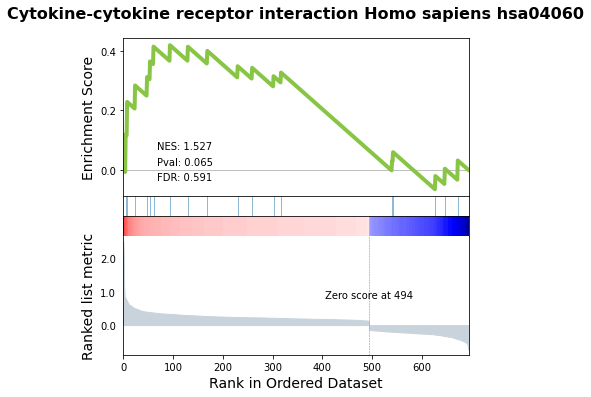

In [95]:
idx = pre_res.res2d.pval.argmin()
gseaplot(rank_metric=pre_res.ranking, term=terms[idx], **pre_res.results[terms[idx]])


<a href="#ex2">Back to Exercise 2</a>
